In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dtype = {'file' : 'str', 'time' : np.float64, '#nodes' : np.float64, 'pathlength' : np.float64, 'horizon' : np.float64, '#moves' : np.float64, 'init_conflicts' : np.float64}

df = pd.read_csv("./benchmarkResults/cbs2.csv", dtype = dtype)
dfg = pd.read_csv("./benchmarkResults/greedy2.csv", dtype = dtype)

dfg

,file,time,#nodes,pathlength,horizon,#moves,init_conflicts
0,benchmark_examples/size5x5/density20/ex1.lp,0.634905,6.0,4.0,5.0,14.0,4.0
1,benchmark_examples/size5x5/density20/ex10.lp,0.067301,2.0,0.0,5.0,17.0,0.0
2,benchmark_examples/size5x5/density20/ex2.lp,0.952244,6.0,4.0,6.0,23.0,6.0
3,benchmark_examples/size5x5/density20/ex3.lp,0.327328,3.0,1.0,7.0,21.0,2.0
4,benchmark_examples/size5x5/density20/ex4.lp,0.644883,4.0,2.0,7.0,22.0,4.0
...,...,...,...,...,...,...,...
195,benchmark_examples/size8x8/density40/ex5.lp,28.952809,137.0,77.0,11.0,166.0,86.0
196,benchmark_examples/size8x8/density40/ex6.lp,25.429027,126.0,74.0,13.0,174.0,66.0
197,benchmark_examples/size8x8/density40/ex7.lp,136.188923,550.0,195.0,15.0,238.0,76.0
198,benchmark_examples/size8x8/density40/ex8.lp,39.036245,189.0,119.0,14.0,214.0,70.0


In [2]:
def size(row):
    return int(str(row["file"]).split("/")[1][-1])

def density(row):
    return int(str(row["file"]).split("/")[2][-2:])

def ex(row):
    return int(str(row["file"]).split("/")[3][2])

df['size'] = df.apply(lambda row: size(row), axis=1)
df['density'] = df.apply(lambda row: density(row), axis=1)
df['ex'] = df.apply(lambda row: ex(row), axis=1)

dfg['size'] = df.apply(lambda row: size(row), axis=1)
dfg['density'] = df.apply(lambda row: density(row), axis=1)
dfg['ex'] = df.apply(lambda row: ex(row), axis=1)

In [3]:
# sort data by size + density

def sort_by_category(to_sort):
    '''returns list of DataFrames'''
    lcg = [] #(List of Categorised Groups)
    for i in range(int((len(to_sort))/10)):
        lcg.append(to_sort.iloc[(i*10):(i*10+10)])
    return lcg

# list of DataFrames, split by size + density
catList = sort_by_category(df)
greedyCatList = sort_by_category(dfg)

# for every df in received list, 
# calculate how many NaN rows are in there
# returns: list of int

def nan_counter(cat_df):
    lc = [] # List of Counts
    for elem in cat_df:
        counter = 0
        for i in range(10):
            if np.isnan(elem["time"].iloc[i]):
                counter += 1
        lc.append(counter)
    return lc

# list of NaN rows in cat_list df
nanList = nan_counter(catList)
greedyNanList = nan_counter(greedyCatList)

print(nanList)
print()

# calculate list of mean times 
def mean_list(df_list, nan_List):
    l = []
    counter = 0
    length = len(df_list[0])
    for elem in df_list:
        tempMean = elem.mean()[0]
        locNans = nan_List[counter]
        if(locNans != 0):
            if(locNans == length):
                tempMean = 300
            else: 
                tempMean = (tempMean * (length - locNans) + locNans * 300) / length
        l.append(tempMean)
        counter += 1
    return l

# list of mean times for each size + density combination
mean = mean_list(catList, nanList)
greedyMean = mean_list(greedyCatList, greedyNanList)
print(mean)

[0, 0, 0, 0, 1, 0, 1, 1, 2, 6, 0, 2, 5, 9, 10, 0, 6, 9, 9, 10]

[1.39555476539972, 0.8756736989991623, 2.160647639700619, 44.99356903209991, 76.75399048520194, 6.765908538600343, 38.01146451080058, 50.825647361299346, 76.74965869329972, 184.27932237050044, 19.979779531301027, 71.14807620970096, 159.26137715240037, 289.14665126590046, 300, 34.45567226349958, 261.54866784770127, 282.78692473479896, 276.0435580966994, 300]


In [4]:
def plotDensity(m,nl):
    points = [20,25,30,35,40]
    
    maxM = max(m)

    fig = plt.figure()
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2, sharey=ax1, sharex=ax1)
    ax3 = fig.add_subplot(2, 3, 3, sharey=ax1, sharex=ax1)
    ax4 = fig.add_subplot(2, 3, 4, sharey=ax1, sharex=ax1)

    ax1.scatter(points, m[:5])
    ax2.scatter(points, m[5:10])
    ax3.scatter(points, m[10:15])
    ax4.scatter(points, m[15:])
    
    ax1.set_xlabel('density in %')
    ax1.set_ylabel('time in s')
    ax1.set_title('size: 5x5')
    ax2.set_xlabel('density in %')
    ax2.set_ylabel('time in s')
    ax2.set_title('size: 6x6')
    ax3.set_xlabel('density in %')
    ax3.set_ylabel('time in s')
    ax3.set_title('size: 7x7')
    ax4.set_xlabel('density in %')
    ax4.set_ylabel('time in s')
    ax4.set_title('size: 8x8')
    
    i = 0
    while i<20:
        if nl[i] > 3:
            if i < 5:
                ax1.vlines(points[i%5]-1, 0, maxM, color="red")
                i=5
                continue
            elif i < 10:
                ax2.vlines(points[i%5]-1, 0, maxM, color="red")
                i=10
                continue
            elif i < 15:
                ax3.vlines(points[i%5]-1, 0, maxM, color="red")
                i=15
                continue
            else:
                ax4.vlines(points[i%5]-1, 0, maxM, color="red")
                break
        i+=1

    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()


    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()

    plt.show()
    
def plotSize(m, nl):
    points = [5,6,7,8]
    
    maxM = max(m)

    fig = plt.figure()
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2, sharey=ax1, sharex=ax1)
    ax3 = fig.add_subplot(2, 3, 3, sharey=ax1, sharex=ax1)
    ax4 = fig.add_subplot(2, 3, 4, sharey=ax1, sharex=ax1)
    ax5 = fig.add_subplot(2, 3, 5, sharey=ax1, sharex=ax1)

    ax1.scatter(points, m[::5])

    for i in range(20)[::5]:
        if nl[i] > 3:
            ax1.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax2.scatter(points, m[1::5])

    for i in range(20)[1::5]:
        if nl[i] > 3:
            ax2.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax3.scatter(points, m[2::5])

    for i in range(20)[2::5]:
        if nl[i] > 3:
            ax3.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax4.scatter(points, m[3::5])

    for i in range(20)[3::5]:
        if nl[i] > 3:
            ax4.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax5.scatter(points, m[4::5])

    for i in range(20)[4::5]:
        if nl[i] > 3:
            ax5.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break
            
    ax1.set_xlabel('instance size')
    ax1.set_ylabel('time in s')
    ax1.set_title('density: 20%')
    ax2.set_xlabel('instance size')
    ax2.set_ylabel('time in s')
    ax2.set_title('density: 25%')
    ax3.set_xlabel('instance size')
    ax3.set_ylabel('time in s')
    ax3.set_title('density: 30%')
    ax4.set_xlabel('instance size')
    ax4.set_ylabel('time in s')
    ax4.set_title('density: 35%')
    ax5.set_xlabel('instance size')
    ax5.set_ylabel('time in s')
    ax5.set_title('density: 40%')

    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()

    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()
    ax5.grid()

    plt.show()

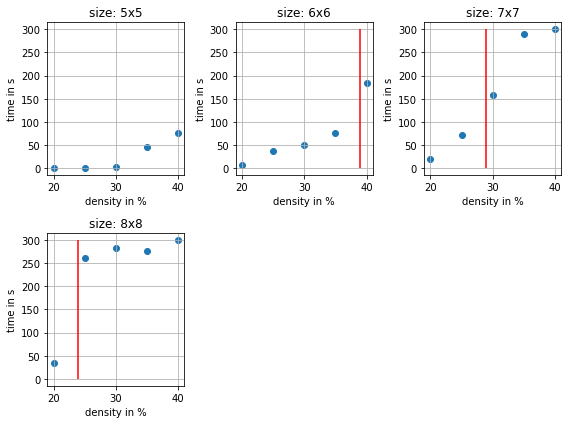

In [5]:
plotDensity(mean, nanList)

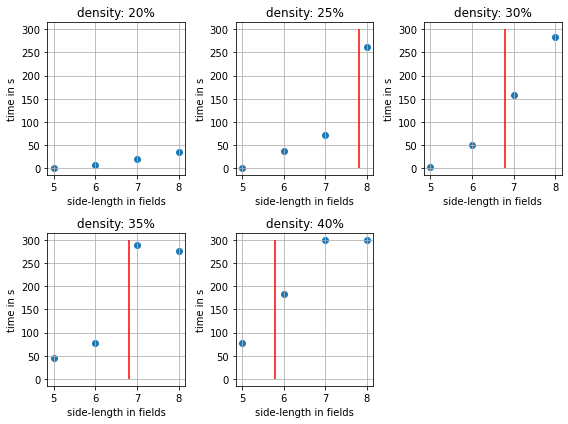

In [6]:
plotSize(mean, nanList)

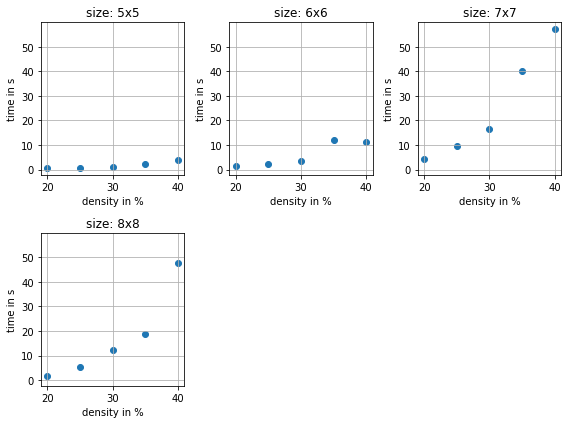

In [7]:
plotDensity(greedyMean, greedyNanList)

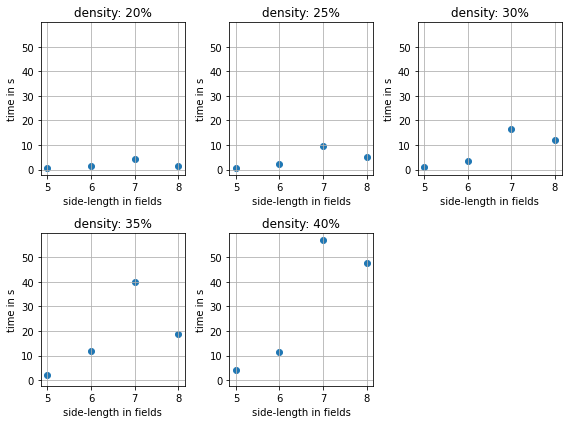

In [8]:
plotSize(greedyMean, greedyNanList)

In [36]:
def compareBar(cl1, cl2, category):
    points = [*range(1,11)]

    for i in range(len(cl1)):

        fig = plt.figure()

        ax = fig.add_subplot(2, 2, 1)

        ax.bar(points, list(cl2[i][category]), color="red")
        ax.bar(points, list(cl1[i][category]), color="blue")
        
        ax.set_xlabel('example number')
        ax.set_ylabel(category)
        ax.set_title('size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax.grid()

        plt.show()
        
def compareScatterTime(cl1, cl2, category):
    for i in range(len(catList)):

        fig = plt.figure()

        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)

        ax1.scatter(list(catList[i][category]), list(cl1[i]['time']))
        ax2.scatter(list(greedyCatList[i][category]), list(cl2[i]['time']))
        
        ax1.set_xlabel(category)
        ax1.set_ylabel('time')
        ax1.set_title('cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')
        ax2.set_xlabel(category)
        ax2.set_ylabel('time')
        ax2.set_title('greedy cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax1.grid()
        ax2.grid()
        

        plt.show()
        
def compareScatter(cl1, cl2, category1, category2):
    for i in range(len(catList)):

        fig = plt.figure()

        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)

        ax1.scatter(list(catList[i][category1]), list(cl1[i][category2]))
        ax2.scatter(list(greedyCatList[i][category1]), list(cl2[i][category2]))
        
        ax1.set_xlabel(category1)
        ax1.set_ylabel(category2)
        ax1.set_title('cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')
        ax2.set_xlabel(category1)
        ax2.set_ylabel(category2)
        ax2.set_title('greedy cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax1.grid()
        ax2.grid()
        

        plt.show()

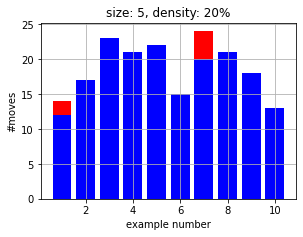

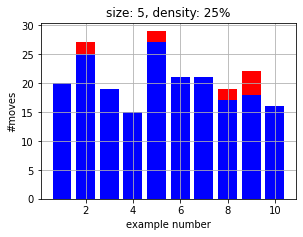

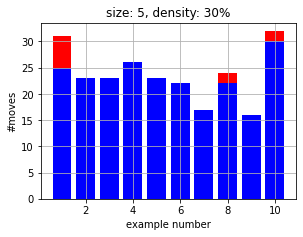

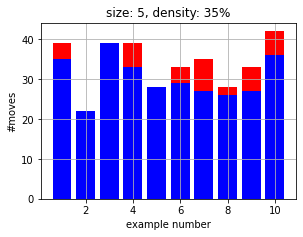

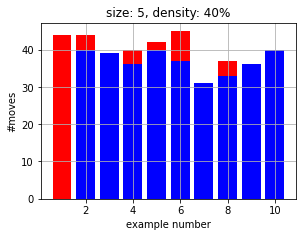

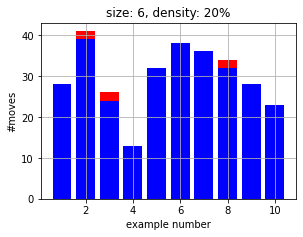

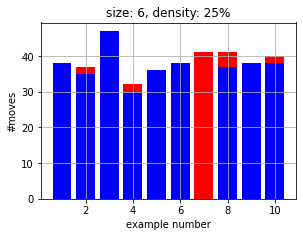

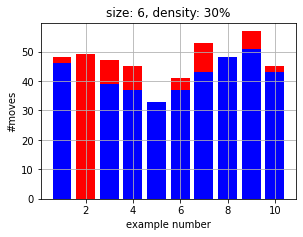

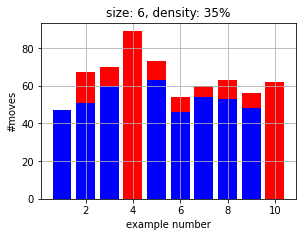

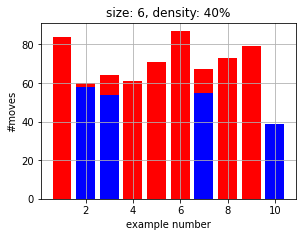

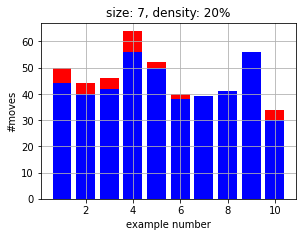

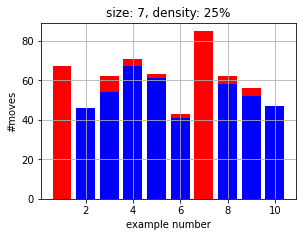

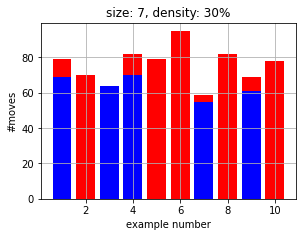

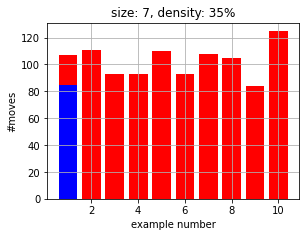

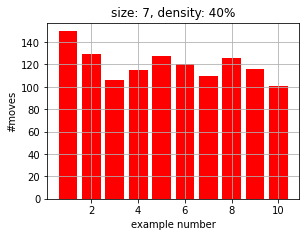

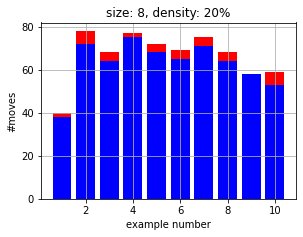

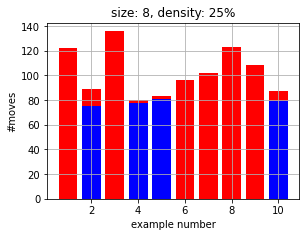

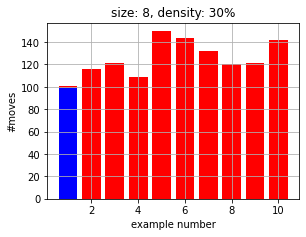

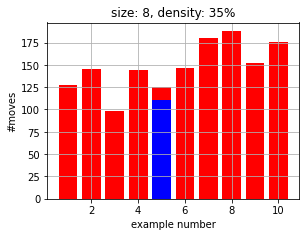

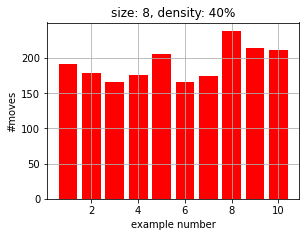

In [37]:
compareBar(catList, greedyCatList, '#moves')

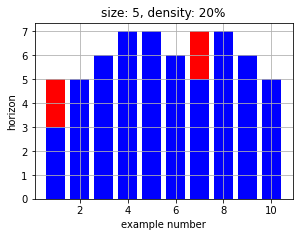

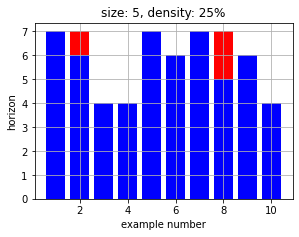

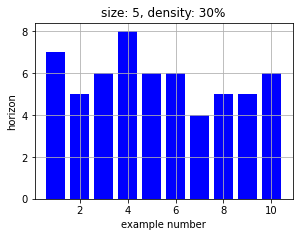

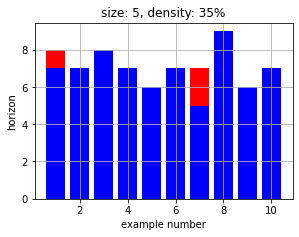

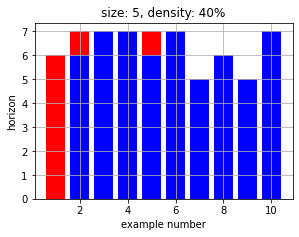

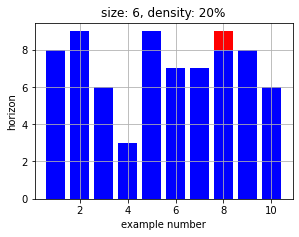

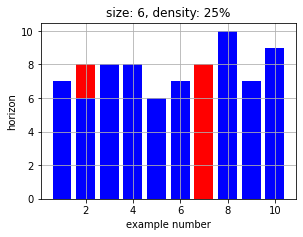

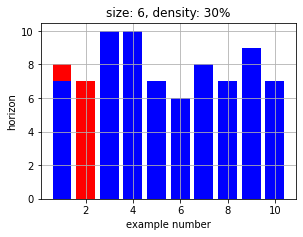

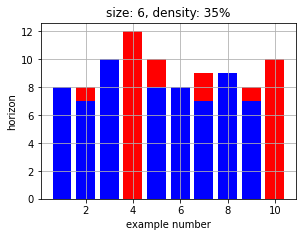

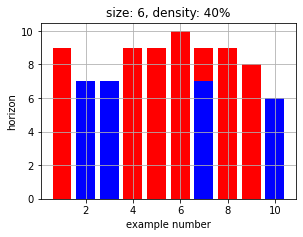

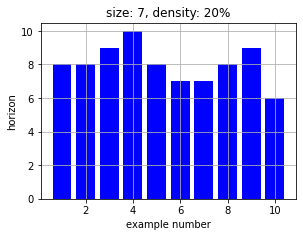

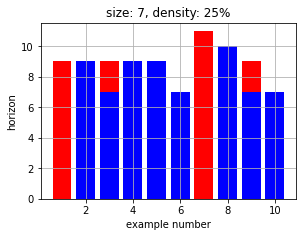

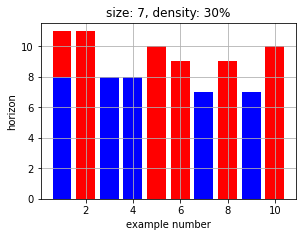

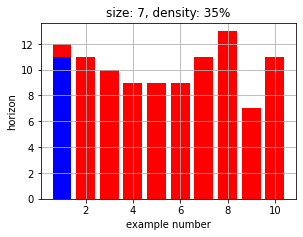

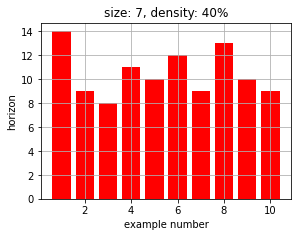

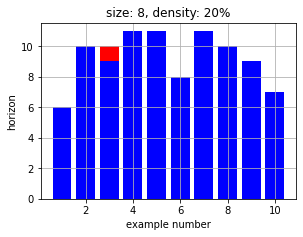

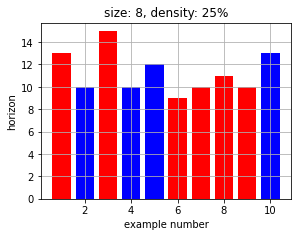

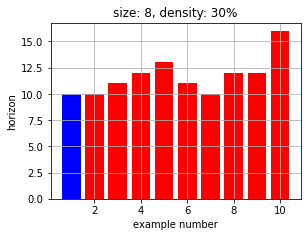

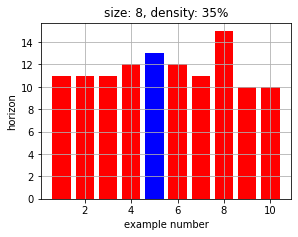

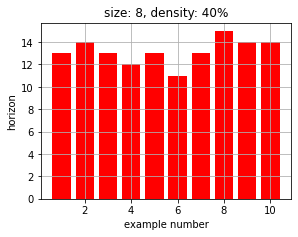

In [38]:
compareBar(catList, greedyCatList, 'horizon')

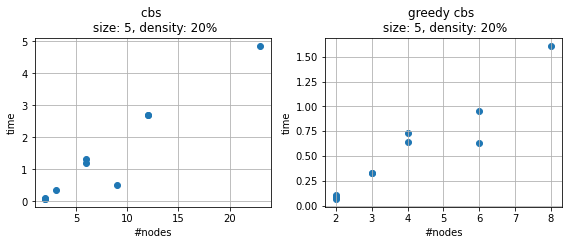

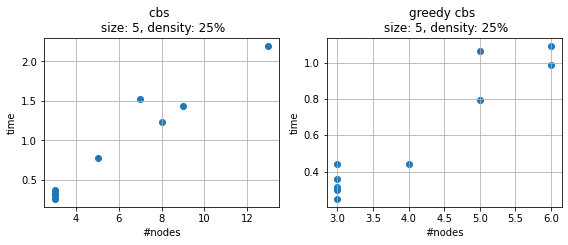

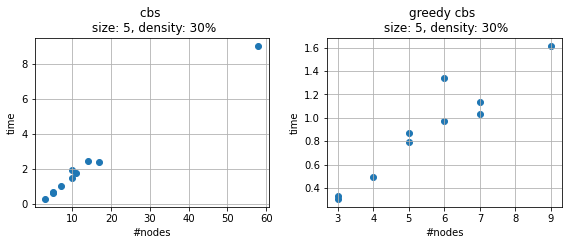

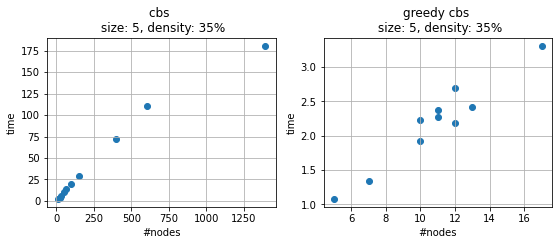

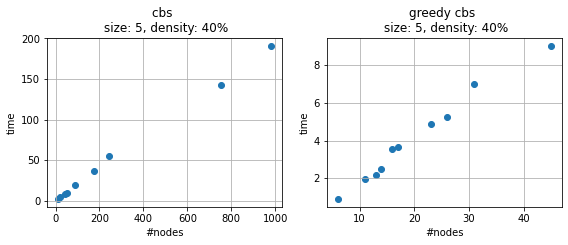

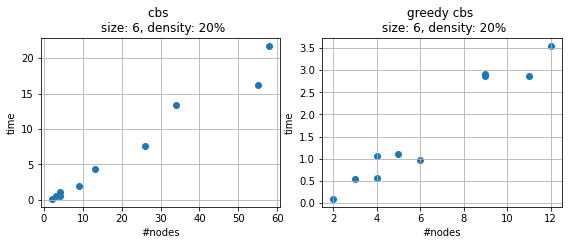

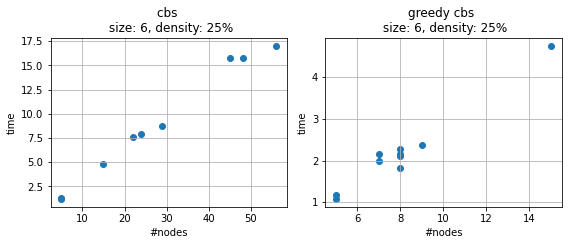

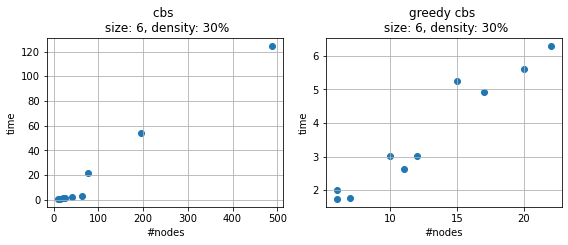

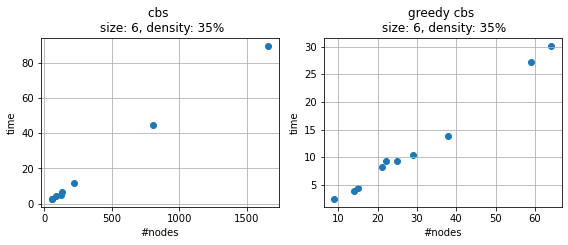

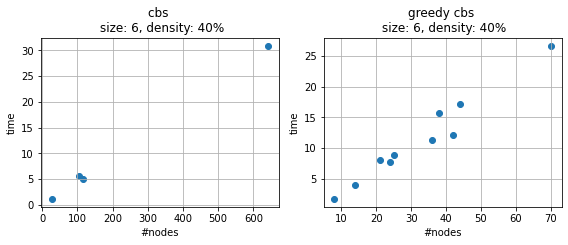

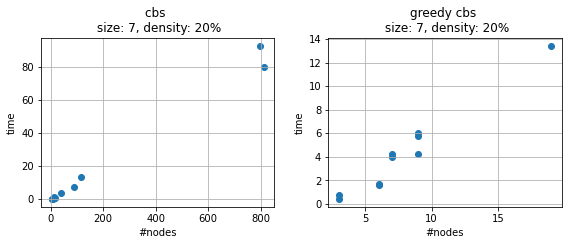

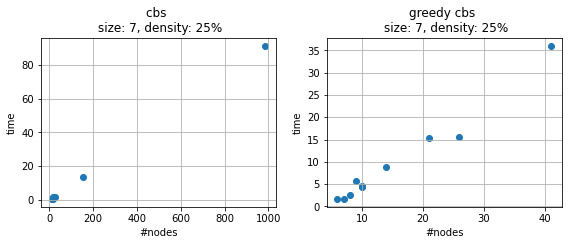

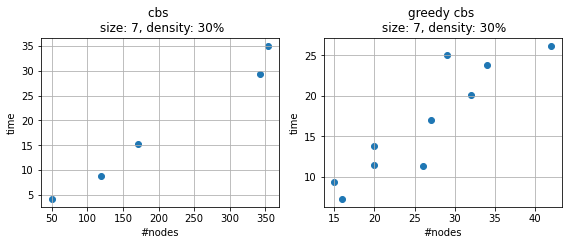

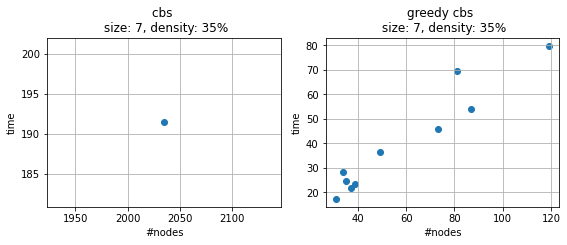

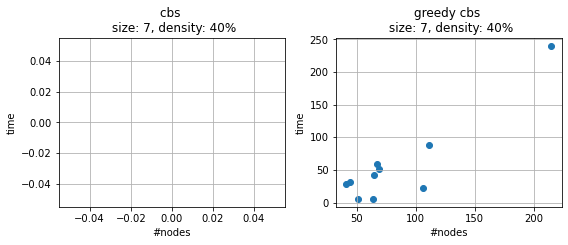

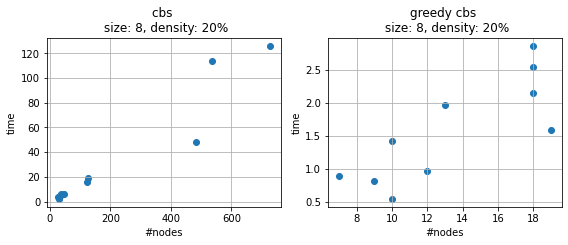

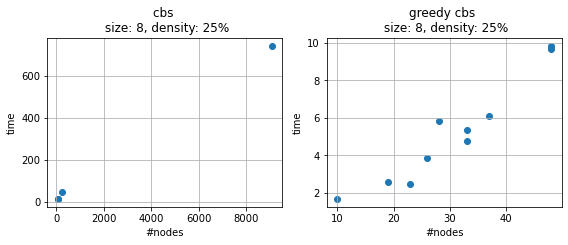

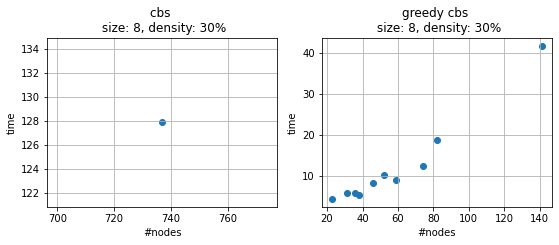

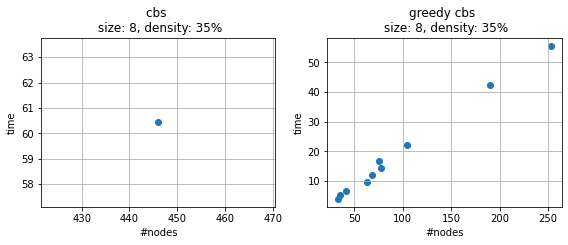

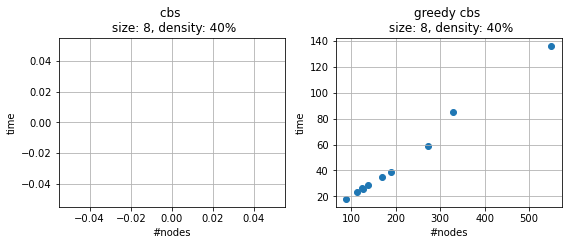

In [39]:
compareScatterTime(catList, greedyCatList, '#nodes')

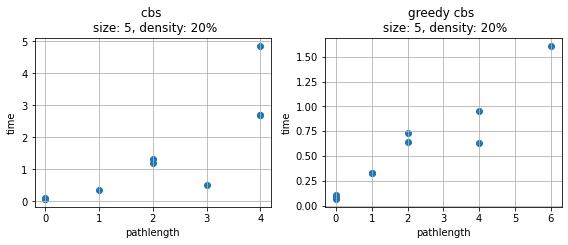

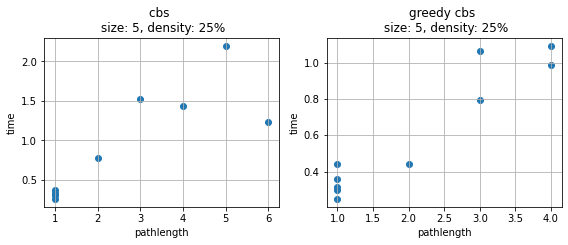

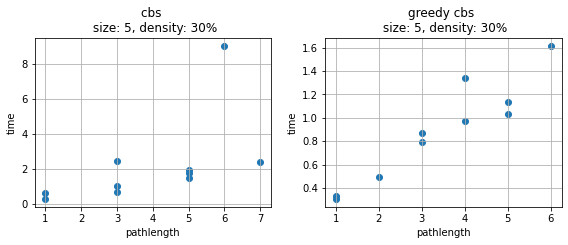

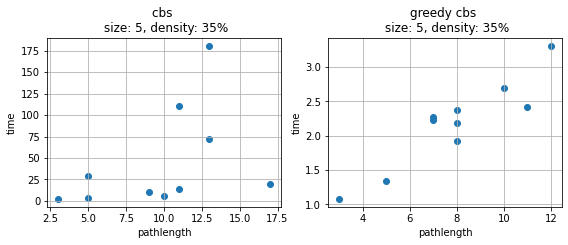

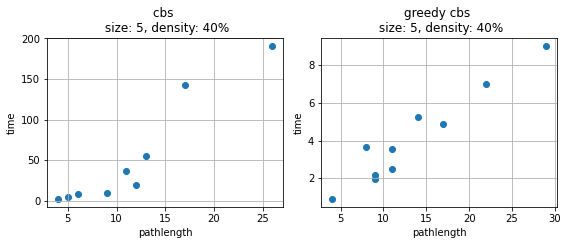

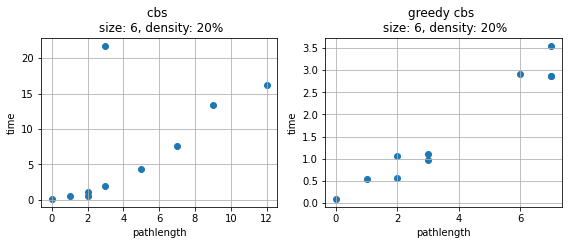

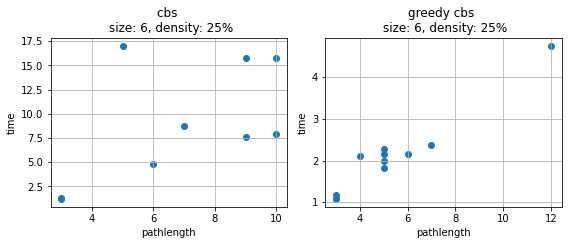

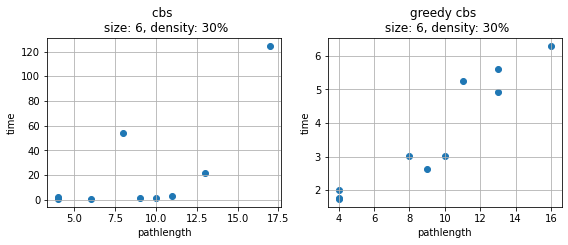

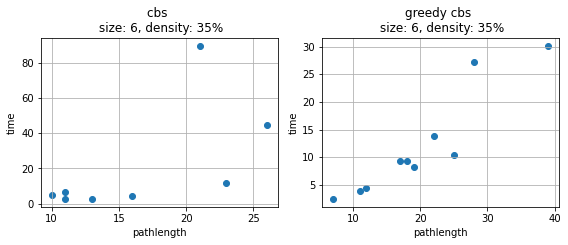

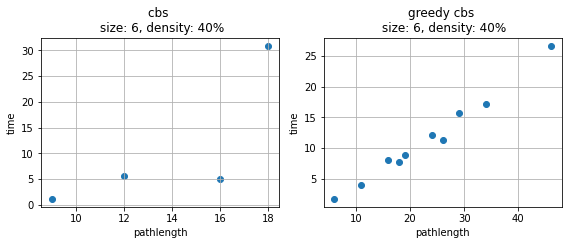

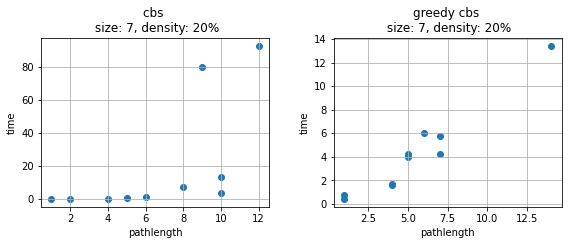

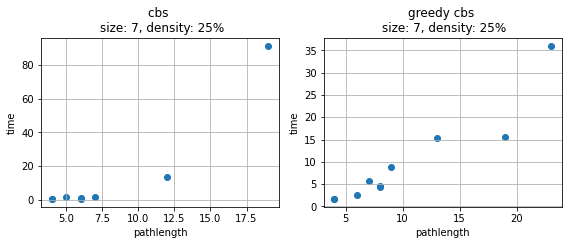

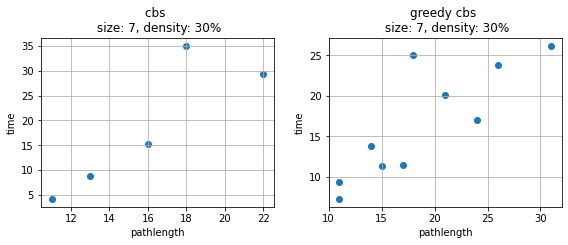

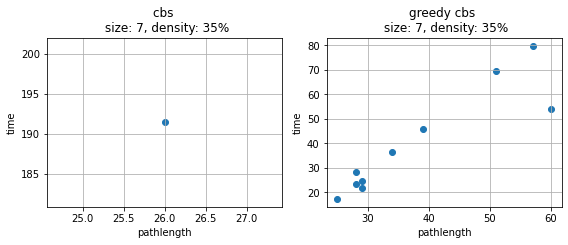

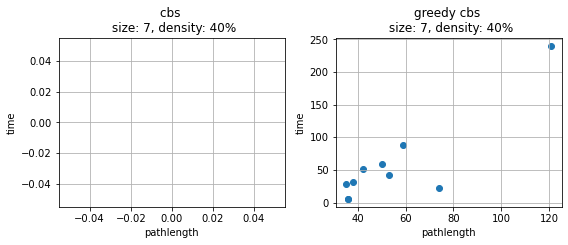

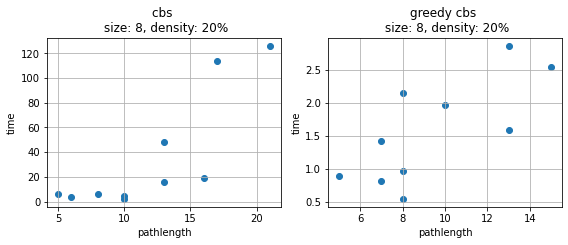

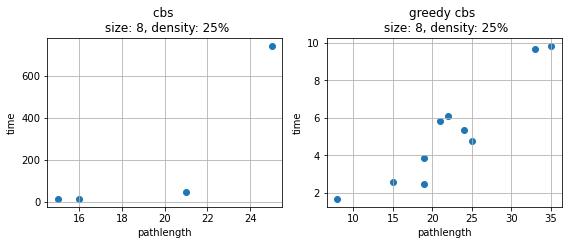

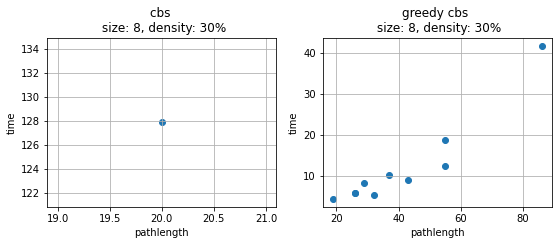

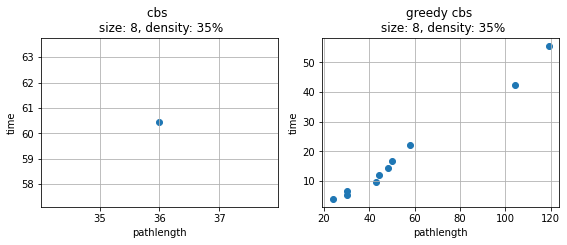

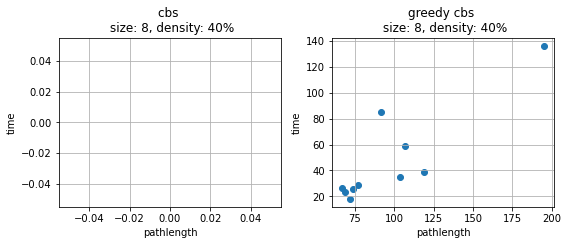

In [40]:
compareScatterTime(catList, greedyCatList, 'pathlength')
#Besonders in interessant! ng logorithmisch, g linear?

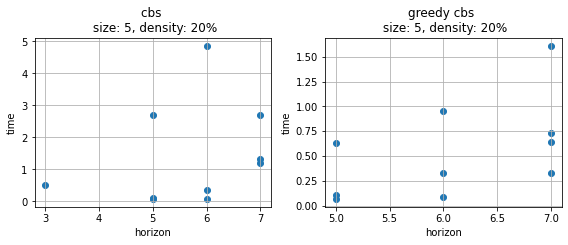

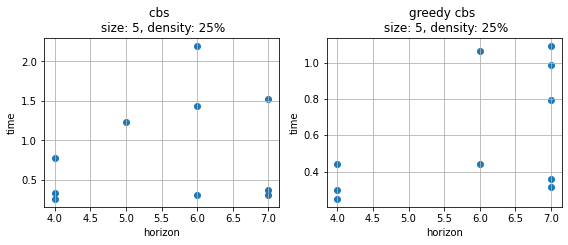

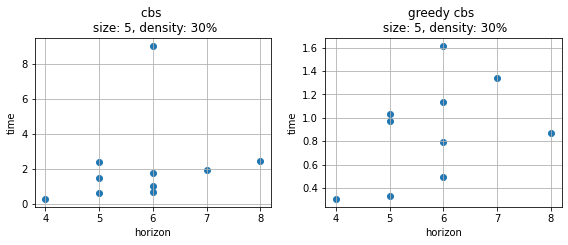

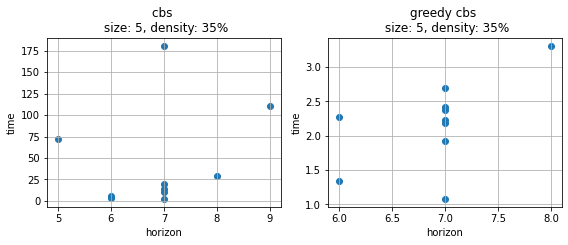

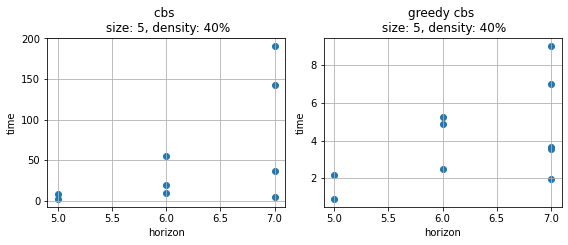

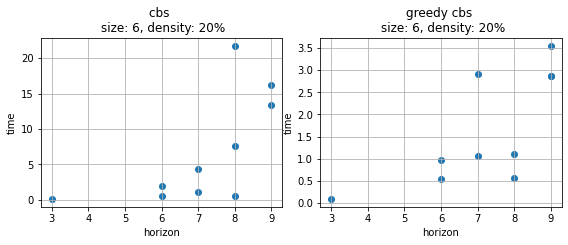

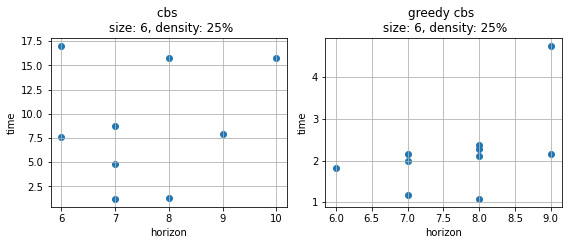

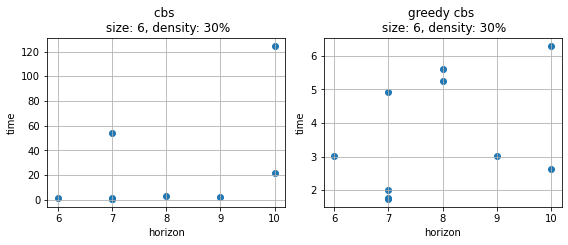

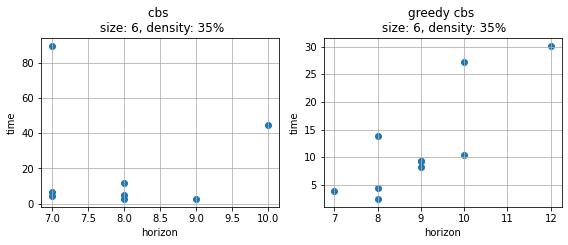

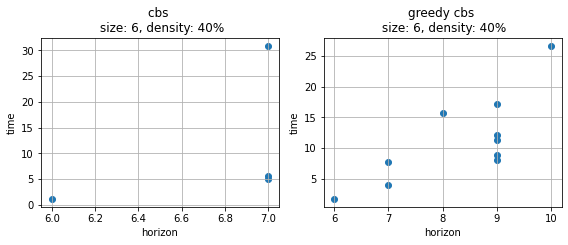

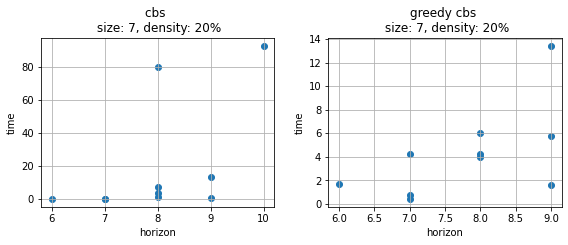

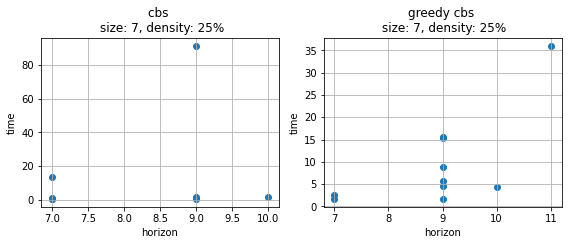

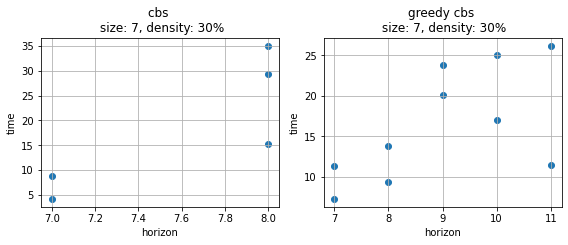

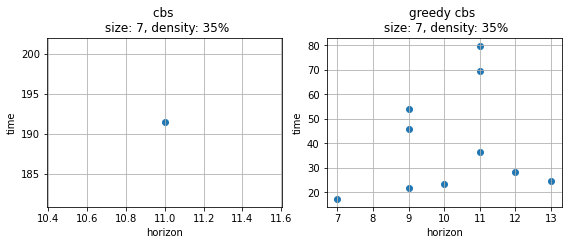

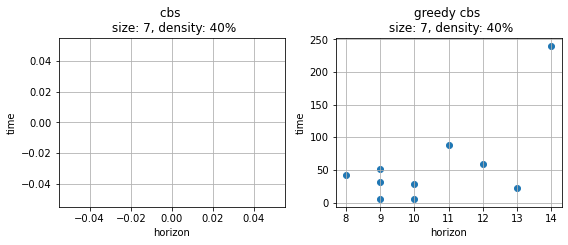

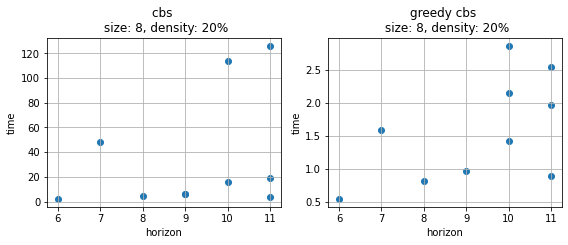

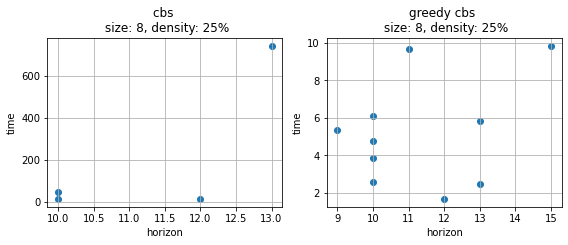

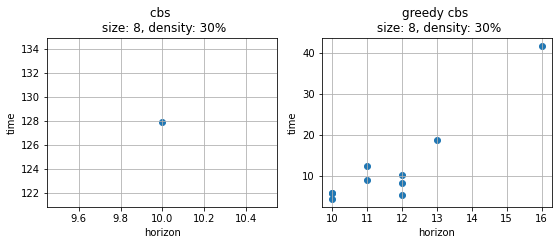

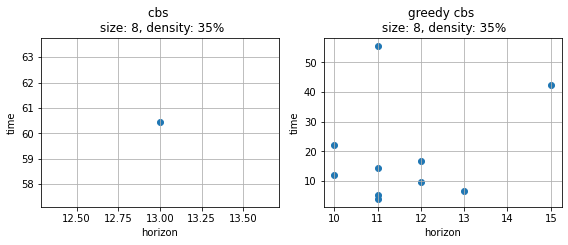

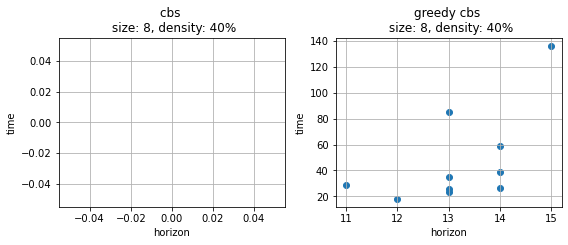

In [41]:
compareScatterTime(catList, greedyCatList, 'horizon')

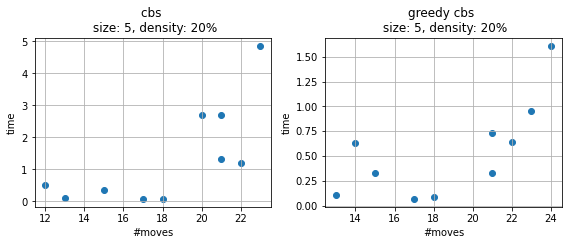

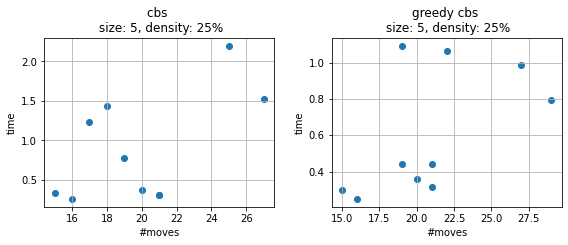

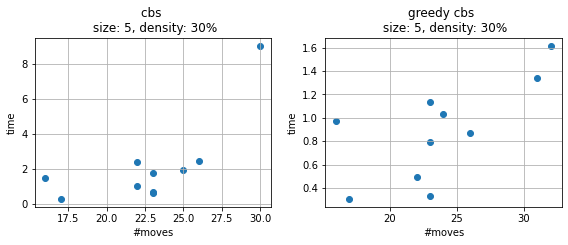

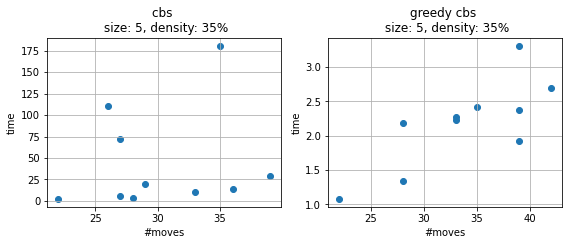

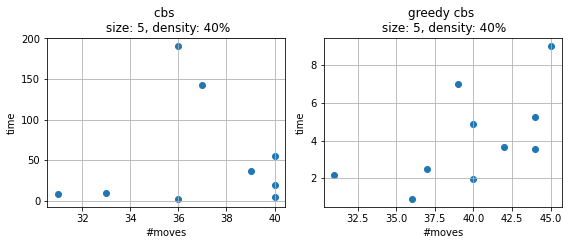

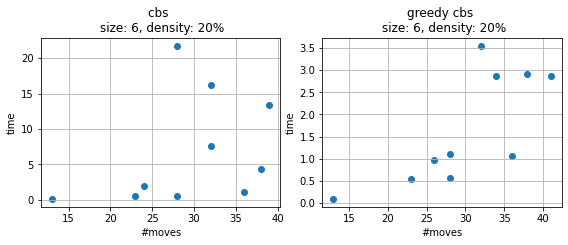

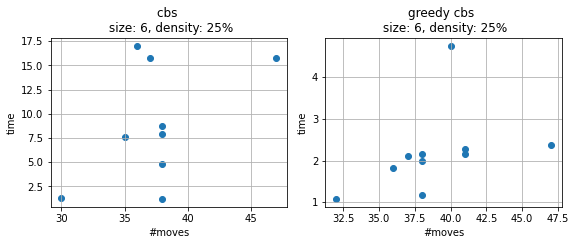

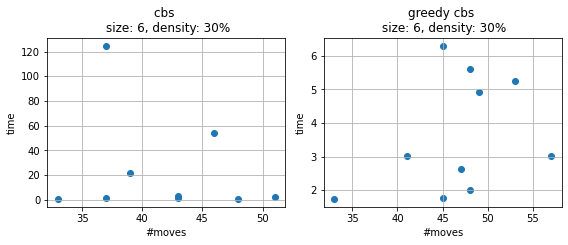

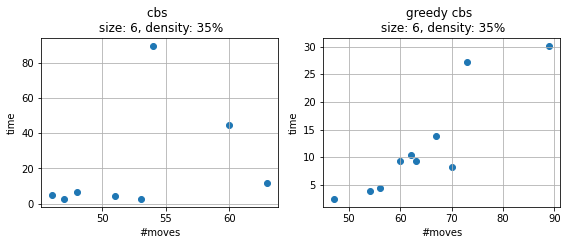

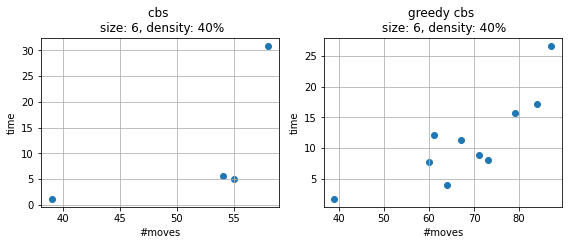

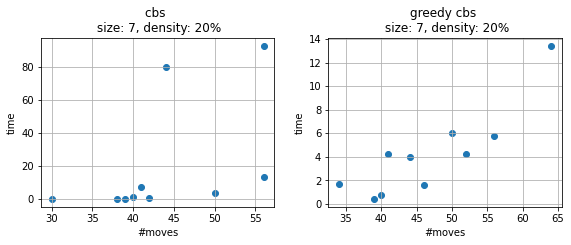

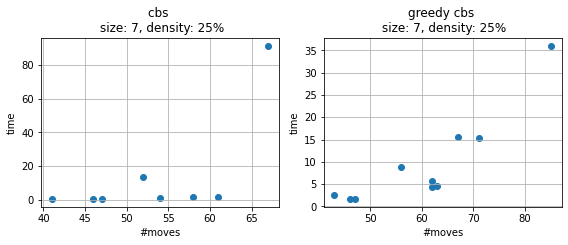

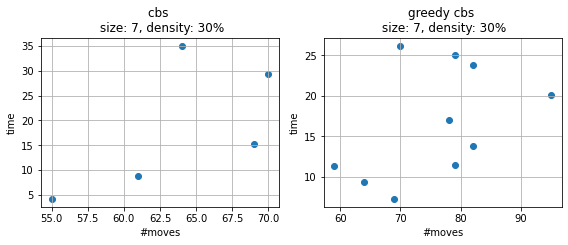

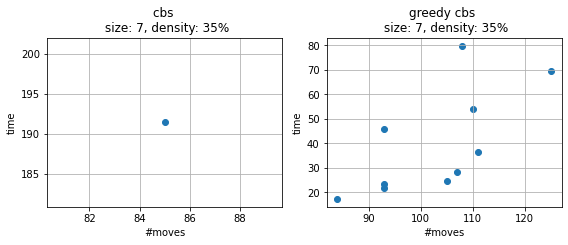

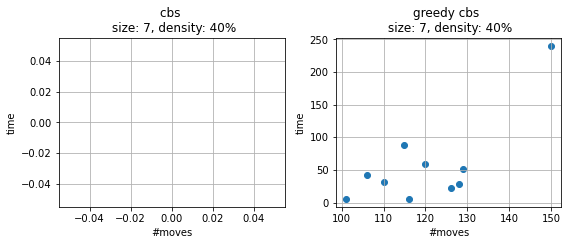

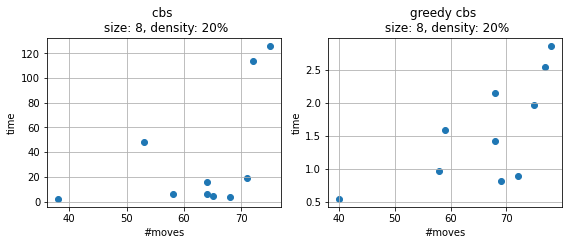

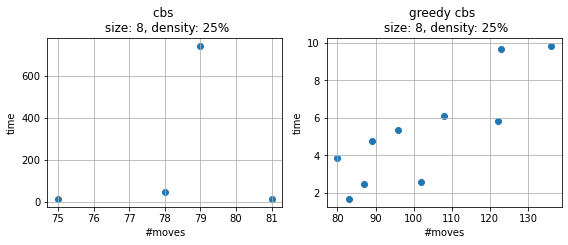

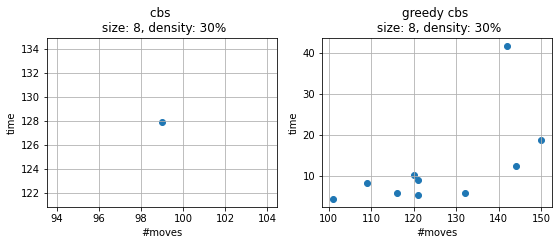

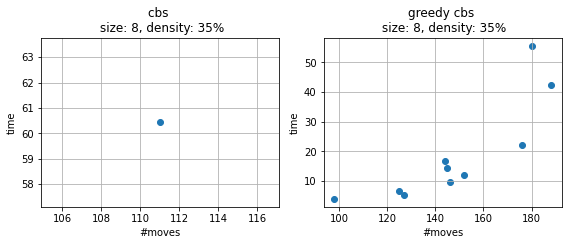

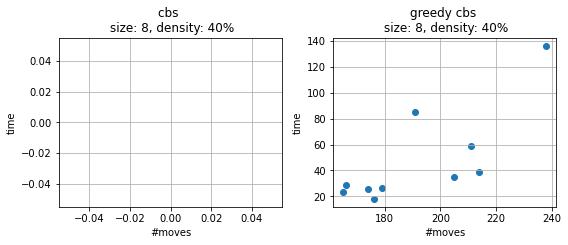

In [42]:
compareScatterTime(catList, greedyCatList, '#moves')

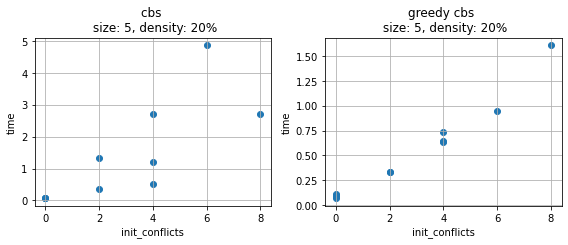

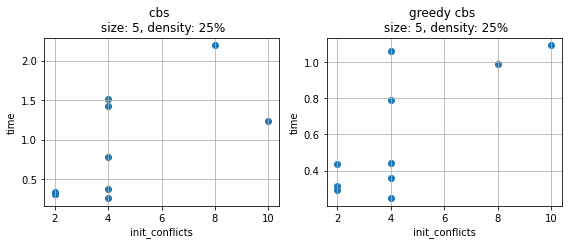

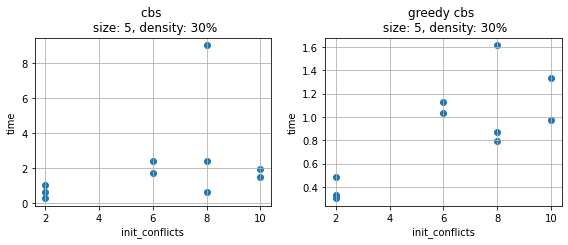

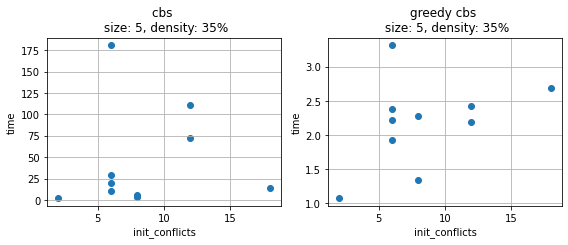

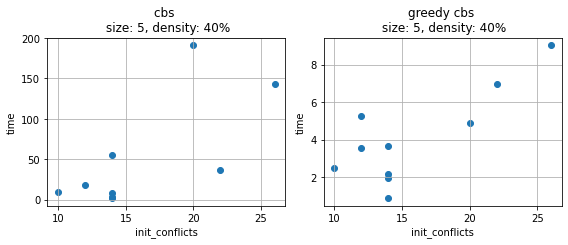

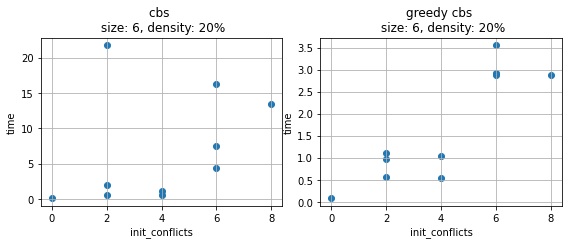

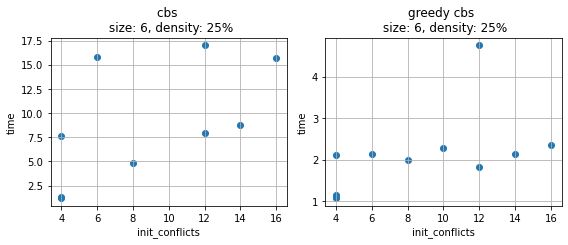

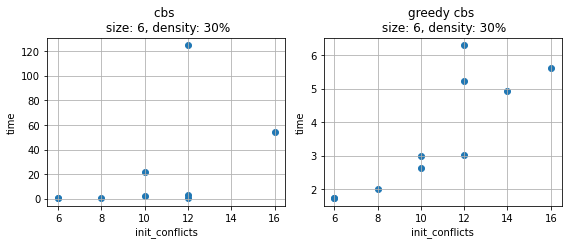

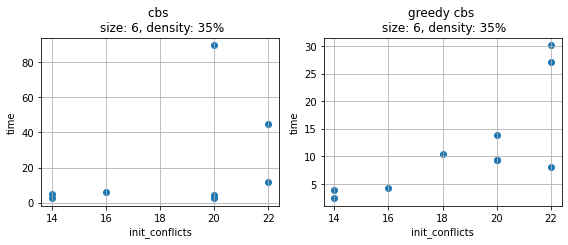

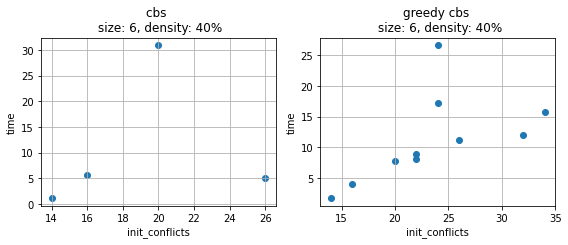

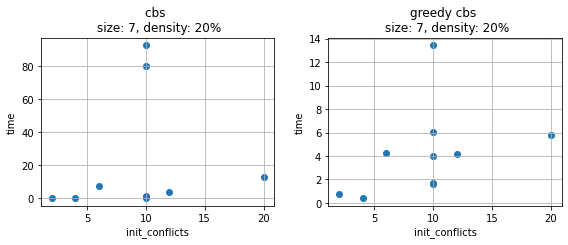

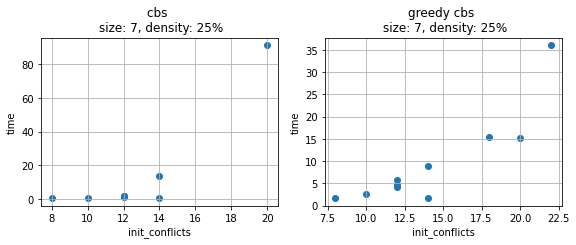

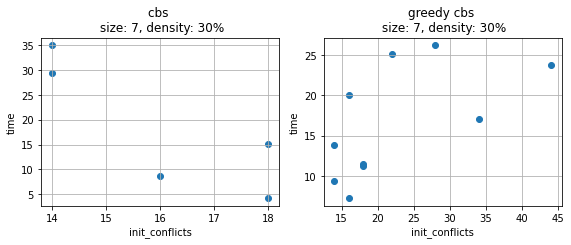

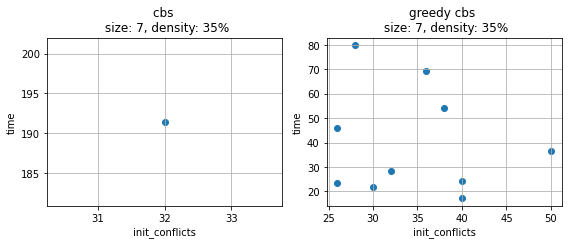

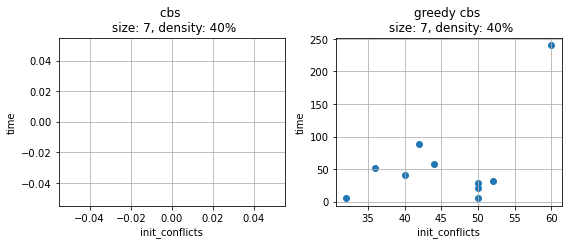

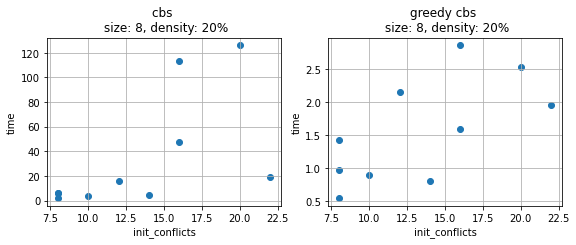

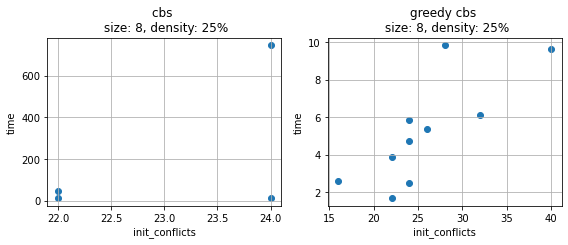

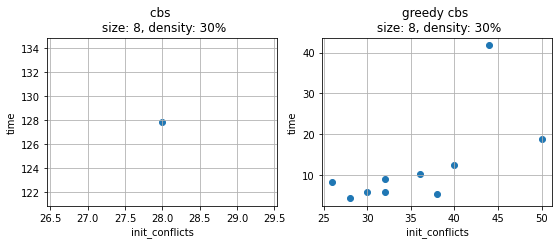

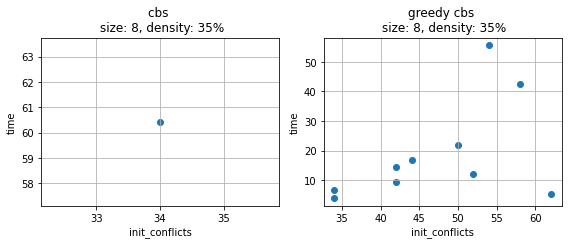

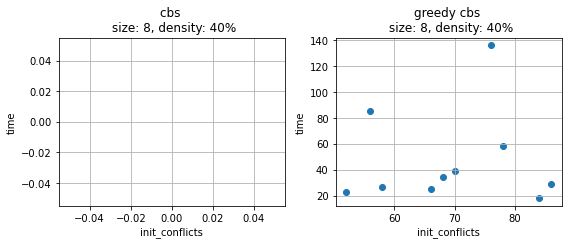

In [43]:
compareScatterTime(catList, greedyCatList, 'init_conflicts')

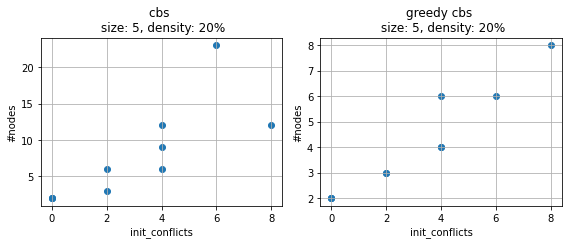

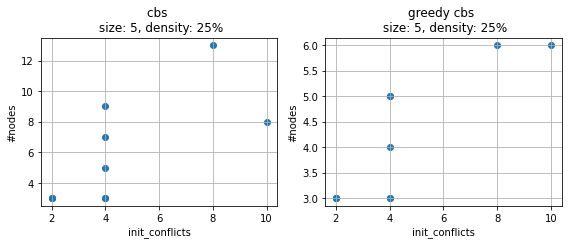

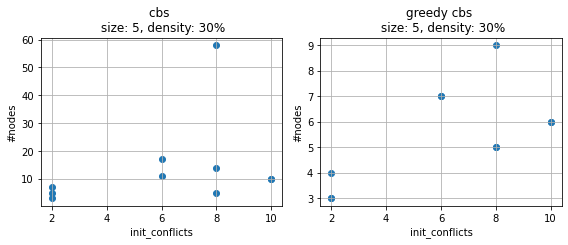

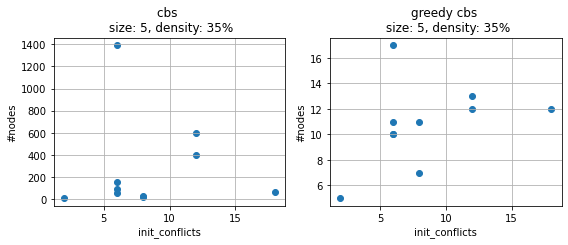

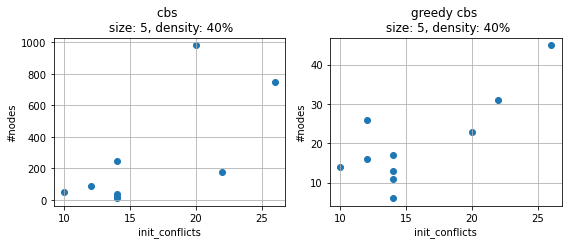

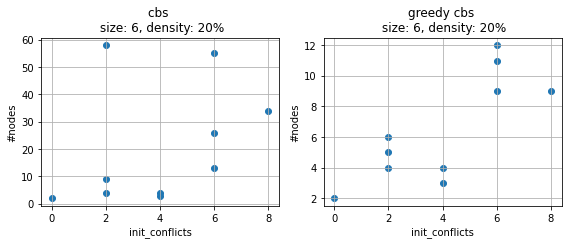

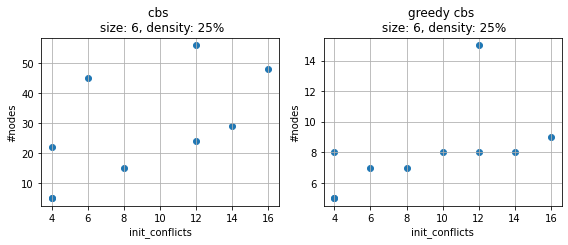

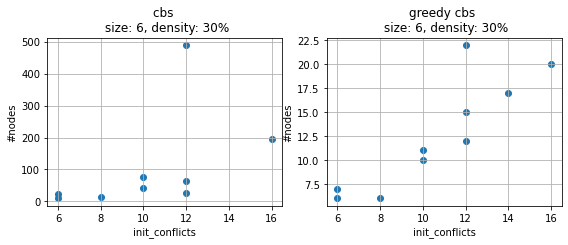

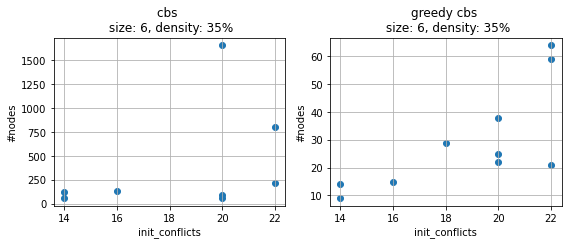

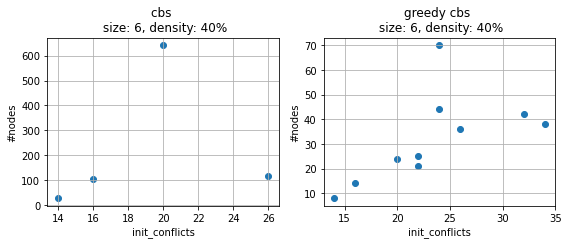

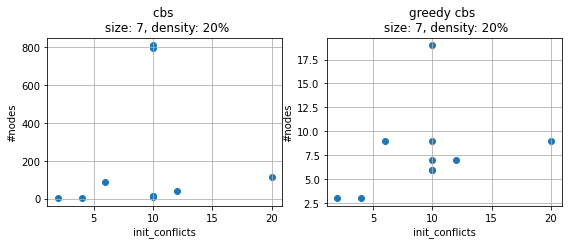

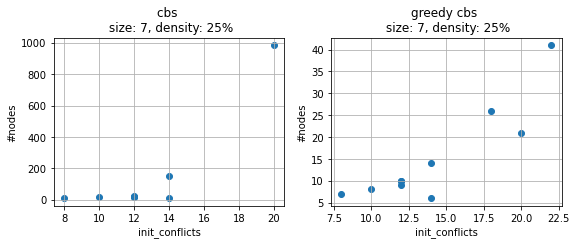

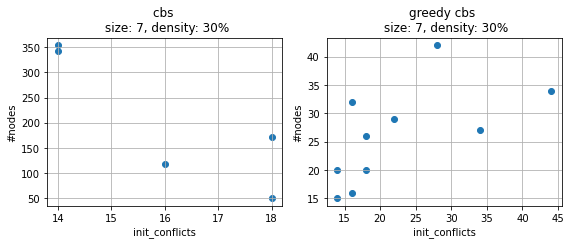

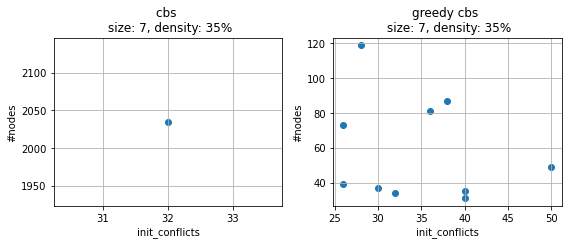

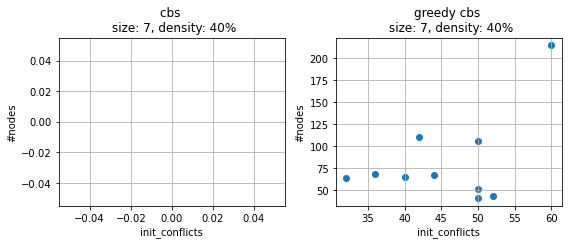

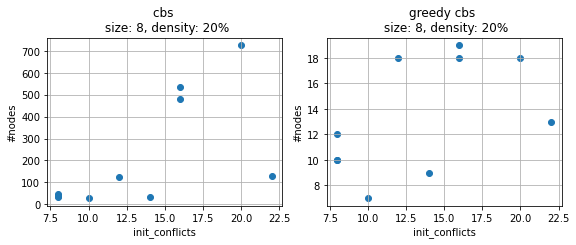

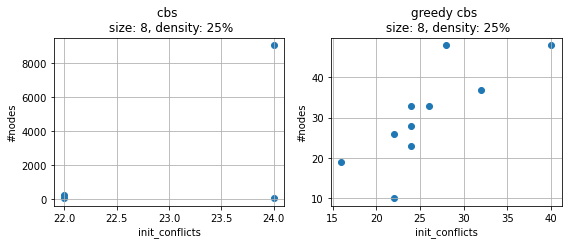

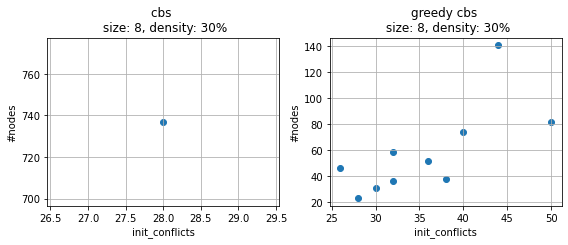

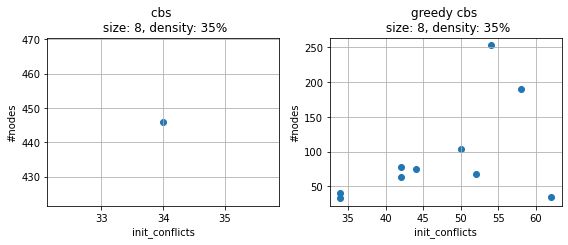

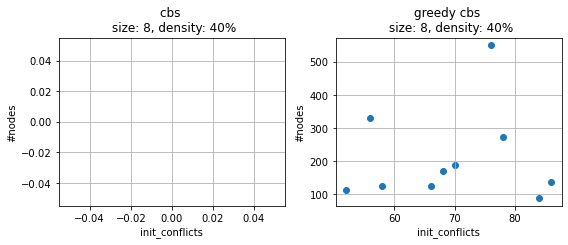

In [44]:
compareScatter(catList, greedyCatList, 'init_conflicts', '#nodes')

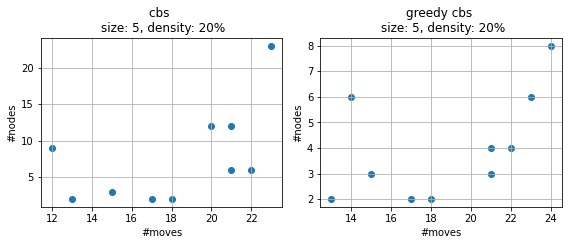

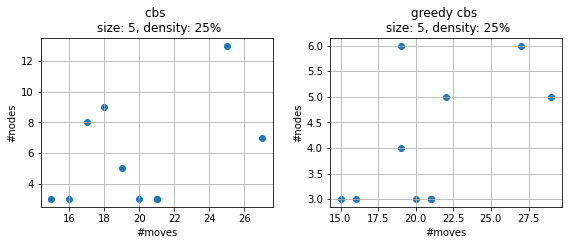

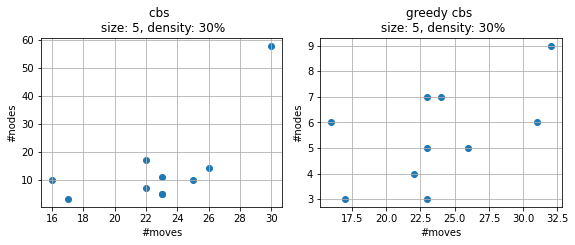

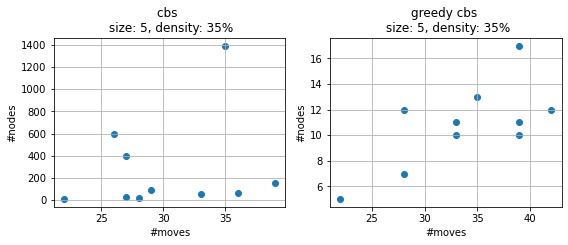

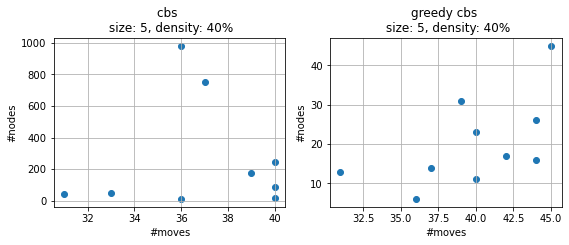

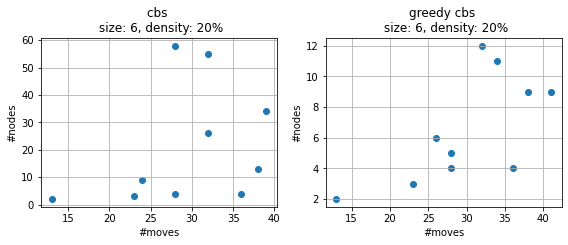

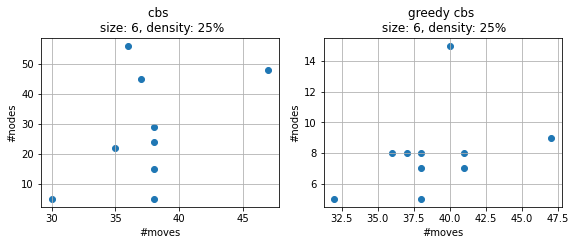

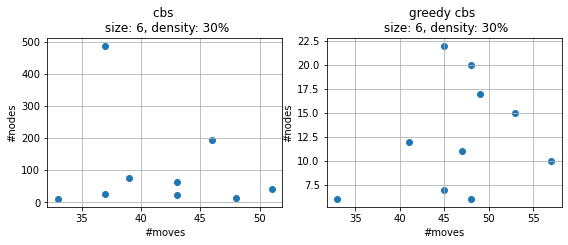

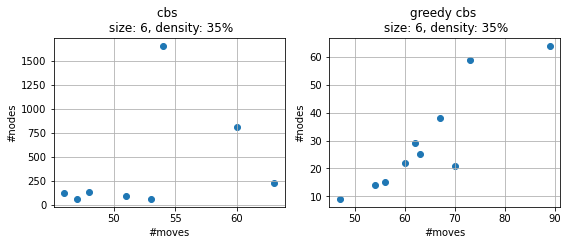

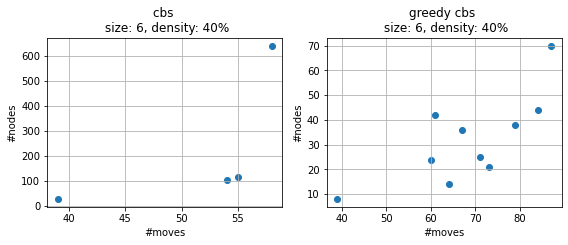

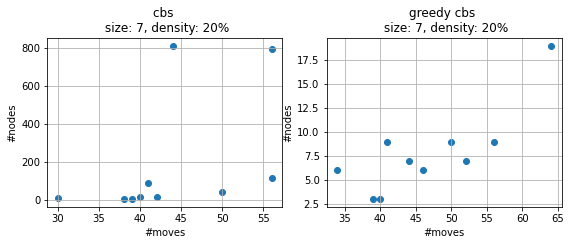

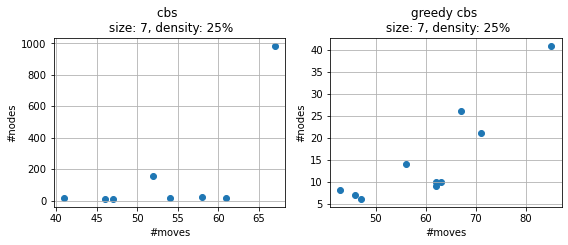

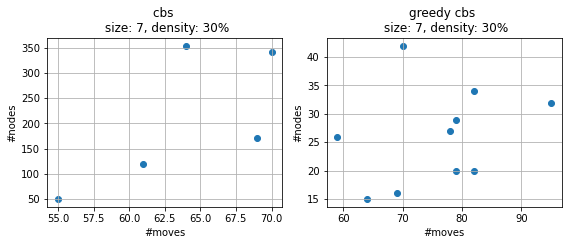

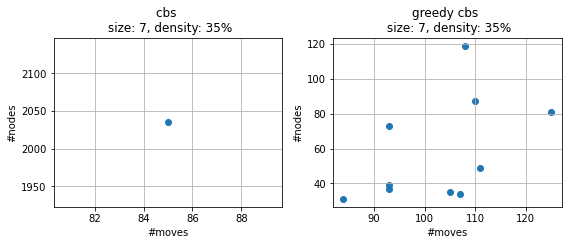

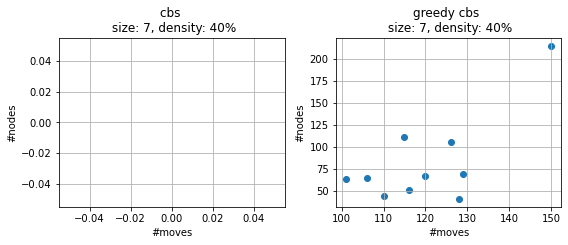

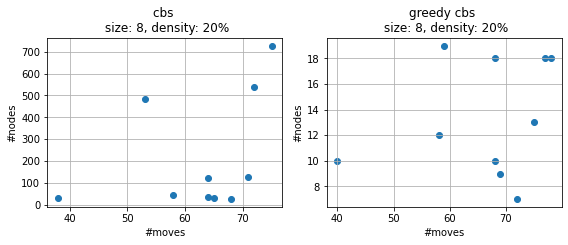

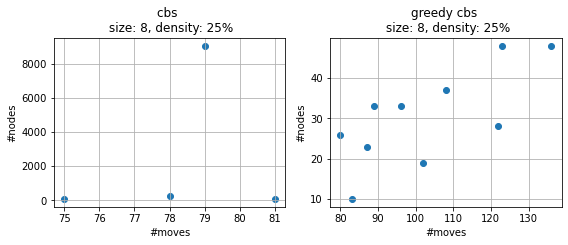

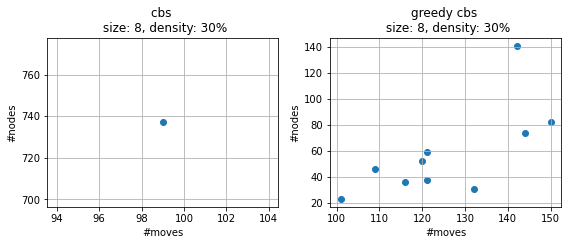

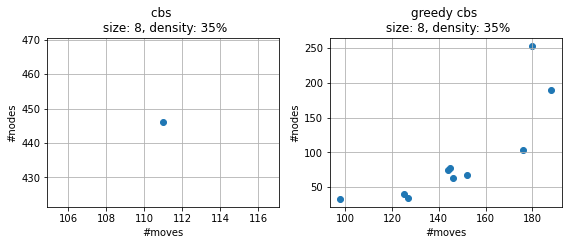

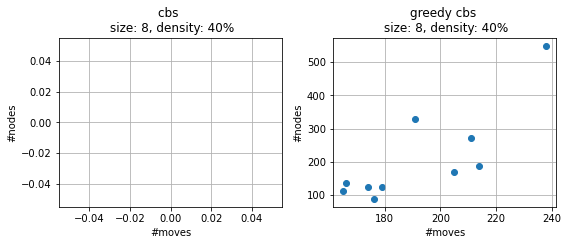

In [45]:
compareScatter(catList, greedyCatList, '#moves', '#nodes')

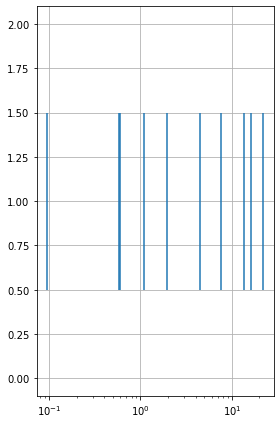

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

plt.xscale('log')

ax1.eventplot(list(catList[5]['time']))

fig.set_size_inches(4, 6, forward=True)
fig.tight_layout()


ax1.grid()

plt.show()

In [31]:
inc_cbs1 = pd.read_csv("inc_benchmarkResults/cbs1.csv")
inc_cbs2 = pd.read_csv("inc_benchmarkResults/cbs2.csv")
inc_cbs3 = pd.read_csv("inc_benchmarkResults/cbs3.csv")

#Nullen bei pathlength sehr komisch, das sollte sich mal jemand anschauen

# use this for only the times
dfic_temp = pd.concat([inc_cbs1.iloc[:,:2], inc_cbs2.iloc[:,:2], inc_cbs3.iloc[:,:2]])
by_row_index = dfic_temp.groupby(dfic_temp.index)

# calculate means for times of all dataframes
dfic_means = by_row_index.mean(numeric_only=True)
dfic_means

dfic = pd.concat([inc_cbs1['file'], dfic_means], axis=1)

In [32]:
def num(row):
    return int(str(row["file"]).split("/")[-1].split("r")[0])

dfic['num'] = dfic.apply(lambda row: num(row), axis=1)
inc_cbs1['num'] = inc_cbs1.apply(lambda row: num(row), axis=1)
inc_cbs2['num'] = inc_cbs2.apply(lambda row: num(row), axis=1)
inc_cbs3['num'] = inc_cbs3.apply(lambda row: num(row), axis=1)

In [46]:
def plotIncLog(dataframe, category, firstConflictOccurence, size):
    dataframe.plot(x="num", y=category, label="solving speed when num of robots gradually increased", kind="scatter", ylim=(0, size*100), xlim=(1,18), logy=True)
    plt.vlines(firstConflictOccurence + 0.5, 10^(-2), size*100, label="first conflict occurs", color="red")
    plt.legend()
    plt.show()
    
def plotInc(dataframe, category, firstConflictOccurence, size):
    dataframe.plot(x="num", y=category, label="initial conflicts when num of robots gradually increased", kind="scatter", ylim=(-2, size), xlim=(1,18))
    plt.legend()
    plt.show()

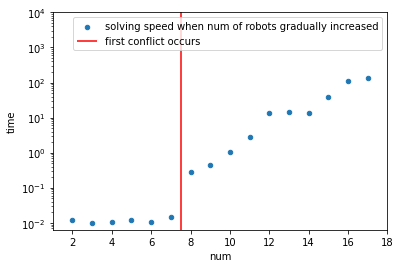

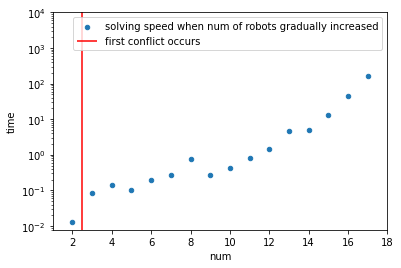

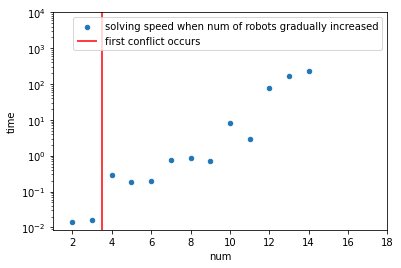

In [47]:
plotIncLog(inc_cbs1, 'time', 7, 100)
plotIncLog(inc_cbs2, 'time', 2, 100)
plotIncLog(inc_cbs3, 'time', 3, 100)

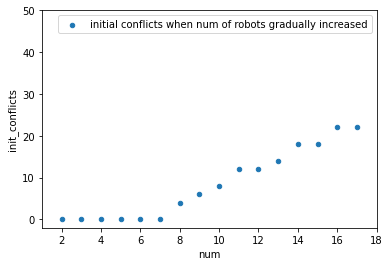

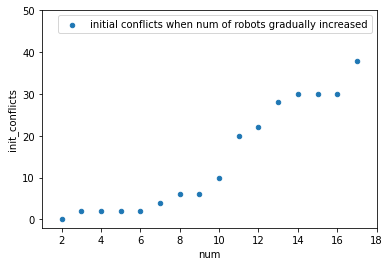

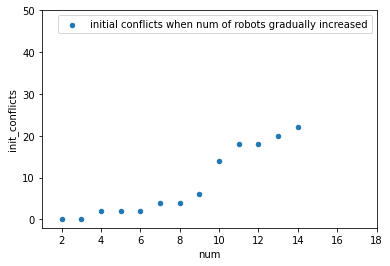

In [48]:
plotInc(inc_cbs1, 'init_conflicts', 7, 50)
plotInc(inc_cbs2, 'init_conflicts', 2, 50)
plotInc(inc_cbs3, 'init_conflicts', 3, 50)